[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alesaccoia/IULM_DDM2324_Notebooks/blob/main/13_italy_population.ipynb)

##Esercizio sulla popolazione italiana

In [1]:
import pandas as pd

!wget "https://github.com/LeoLin72/IULM_DDM2324_Notebooks/raw/main/data/italy_population_administrative_layers.xlsx"
# a.1
# Carica il foglio "Raw Data" dal file fornito
df = pd.read_excel("italy_population_administrative_layers.xlsx", sheet_name="Raw Data")

# Mostra le prime righe del dataset per comprendere la struttura dei dati
# a.2
df.head()


--2024-04-09 14:45:37--  https://github.com/LeoLin72/IULM_DDM2324_Notebooks/raw/main/data/italy_population_administrative_layers.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LeoLin72/IULM_DDM2324_Notebooks/main/data/italy_population_administrative_layers.xlsx [following]
--2024-04-09 14:45:37--  https://raw.githubusercontent.com/LeoLin72/IULM_DDM2324_Notebooks/main/data/italy_population_administrative_layers.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45407919 (43M) [application/octet-stream]
Saving to: ‘italy_population_administrative_layers.xlsx’

italy_population_ad 100%[====

,COUNTRY,A_ID_0,A_LBL_0,A_ID_1,A_LBL_1,A_ID_2,A_LBL_2,A_ID_3,A_LBL_3,NIELSEN_A_ID,Eta,Totale Maschi,Totale Femmine,Totale
0,ITA,0,Italia,20,Sardegna,92,Cagliari,92009,Cagliari,3,0,313,327,640
1,ITA,0,Italia,20,Sardegna,92,Cagliari,92009,Cagliari,3,1,348,367,715
2,ITA,0,Italia,20,Sardegna,92,Cagliari,92009,Cagliari,3,2,395,403,798
3,ITA,0,Italia,20,Sardegna,92,Cagliari,92009,Cagliari,3,3,451,388,839
4,ITA,0,Italia,20,Sardegna,92,Cagliari,92009,Cagliari,3,4,468,422,890


In [3]:
#a.3
df = df[df['Eta'] != 999]


In [4]:
# b.1
num_comuni = df['A_ID_3'].nunique()
print(f"Sono presenti {num_comuni} codici comune unici")

# b.2
total_males = df['Totale Maschi'].sum()
total_females = df['Totale Femmine'].sum()
print(f"Il numero totale di maschi in Italia é {total_males}")
print(f"Il numero totale di femmine in Italia é {total_females}")


Sono presenti 7912 codici comune unici
Il numero totale di maschi in Italia é 29041830
Il numero totale di femmine in Italia é 30582625


In [5]:
# b.3
grouped = df.groupby(['A_ID_2', 'A_LBL_2', 'A_ID_3', 'A_LBL_3'])['Totale'].sum()
highest_population_comune = grouped.idxmax()
lowest_population_comune = grouped.idxmin()


highest_population_value = grouped[highest_population_comune]
lowest_population_value = grouped[lowest_population_comune]

print(f"Il comune più popoloso in Italia è {highest_population_comune} con una popolazione di {highest_population_value}")
print(f"Il comune meno popoloso in Italia è {lowest_population_comune} con una popolazione di {lowest_population_value}")



Il comune più popoloso in Italia è (58, 'Roma', 58091, 'Roma') con una popolazione di 2808293
Il comune meno popoloso in Italia è (97, 'Lecco', 97055, 'Morterone') con una popolazione di 30


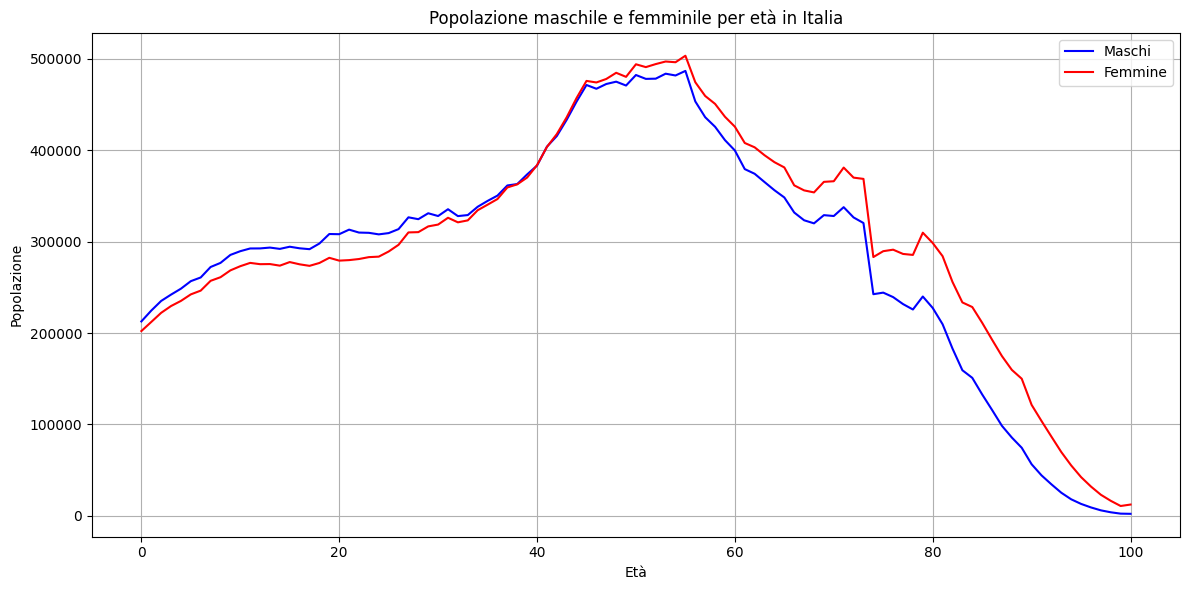

In [6]:
# c.2
import matplotlib.pyplot as plt

# Raggruppiamo per 'Eta' e sommiamo i valori per 'Totale Maschi' e 'Totale Femmine'
grouped_by_age = df.groupby('Eta').agg({'Totale Maschi': 'sum', 'Totale Femmine': 'sum'}).reset_index()

# Creiamo il grafico a linee
plt.figure(figsize=(12, 6))
plt.plot(grouped_by_age['Eta'], grouped_by_age['Totale Maschi'], label='Maschi', color='blue')
plt.plot(grouped_by_age['Eta'], grouped_by_age['Totale Femmine'], label='Femmine', color='red')
plt.xlabel('Età')
plt.ylabel('Popolazione')
plt.title('Popolazione maschile e femminile per età in Italia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# c.3
max_males_age = grouped_by_age['Totale Maschi'].idxmax()
max_females_age = grouped_by_age['Totale Femmine'].idxmax()

max_males_age, max_females_age


In [7]:
# Supponendo l'esistenza del DataFrame df

# Calcola la popolazione totale per ogni regione
total_population_by_region = df.groupby('A_LBL_1')['Totale'].sum()

# Calcola la popolazione degli anziani (età > 65) per ogni regione
elderly_population_by_region = df[df['Eta'] > 65].groupby('A_LBL_1')['Totale'].sum()

# Calcola la proporzione del numero di anziani rispetto al totale della popolazione per ogni regione
proportion_elderly_by_region = elderly_population_by_region / total_population_by_region

proportion_elderly_by_region.sort_values(ascending=False)


A_LBL_1
Liguria                  0.274369
Friuli Venezia Giulia    0.252694
Umbria                   0.246992
Piemonte                 0.246165
Toscana                  0.244920
Marche                   0.239530
Molise                   0.238686
Sardegna                 0.230304
Emilia-Romagna           0.229966
Abruzzo                  0.229912
Valle d'Aosta            0.229674
Basilicata               0.221607
Veneto                   0.220693
Lombardia                0.217394
Puglia                   0.213222
Lazio                    0.209779
Calabria                 0.208752
Sicilia                  0.204117
Trentino-Alto Adige      0.200361
Campania                 0.180579
Name: Totale, dtype: float64

# Calcola l'età media pesata per ciascuna regione (esercizio 3 capitolo 4)

In [8]:
# Moltiplica l'età per la popolazione totale per ottenere il peso totale per ogni età
df['weighted_age'] = df['Eta'] * df['Totale']

# Calcola la somma dei pesi e la popolazione totale per ciascuna regione
sum_weights = df.groupby('A_LBL_1')['weighted_age'].sum()
sum_population = df.groupby('A_LBL_1')['Totale'].sum()

# Calcola l'età media pesata dividendo la somma dei pesi per la popolazione totale
average_weighted_age = sum_weights / sum_population
average_weighted_age.sort_values(ascending=False)


A_LBL_1
Liguria                  48.719653
Friuli Venezia Giulia    47.306784
Piemonte                 46.829720
Toscana                  46.817073
Umbria                   46.805737
Sardegna                 46.779786
Molise                   46.698432
Marche                   46.427492
Abruzzo                  46.013706
Valle d'Aosta            45.971216
Emilia-Romagna           45.931917
Basilicata               45.662961
Veneto                   45.442861
Lombardia                45.020239
Lazio                    44.964875
Puglia                   44.610702
Calabria                 44.363277
Sicilia                  43.874251
Trentino-Alto Adige      43.482566
Campania                 42.492762
dtype: float64

##Calcolo del P-value e F value

In [9]:
import scipy.stats as stats

# Crea una lista di età per ciascuna regione
ages_by_region = [df['weighted_age'][df['A_LBL_1'] == region] for region in df['A_LBL_1'].unique()]

# Esegui il test ANOVA
f_statistic, p_value = stats.f_oneway(*ages_by_region)

print(f"F statistic: {f_statistic}")
print(f"P-value: {p_value}")


F statistic: 231.53431897915394
P-value: 0.0
